In [1]:
# Install required libraries
!pip install umap-learn
!pip install plotly

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import plotly.express as px
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis, IncrementalPCA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


Step 2: Load and Preprocess Datasets

In [2]:
# Load Iris dataset (Tabular data)
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

# Load MNIST dataset (Image data)
digits = datasets.load_digits()
digits_data = digits.data
digits_target = digits.target

# Normalize data for better performance in dimensionality reduction
iris_data = StandardScaler().fit_transform(iris_data)
digits_data = StandardScaler().fit_transform(digits_data)

Step 3: Dimensionality Reduction Techniques

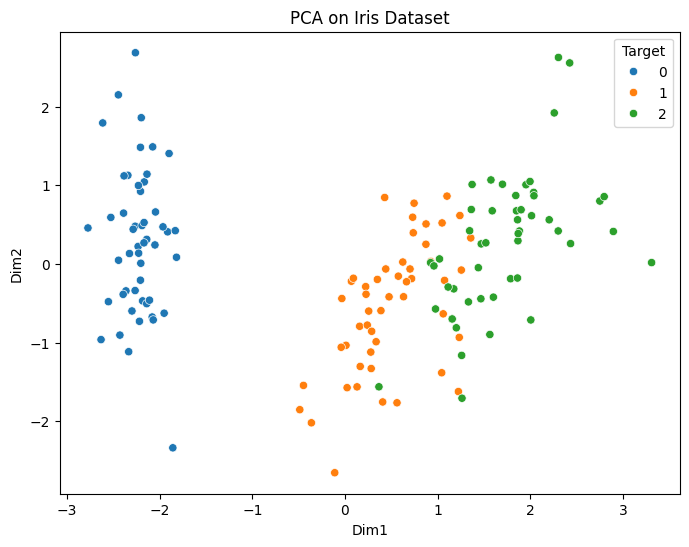

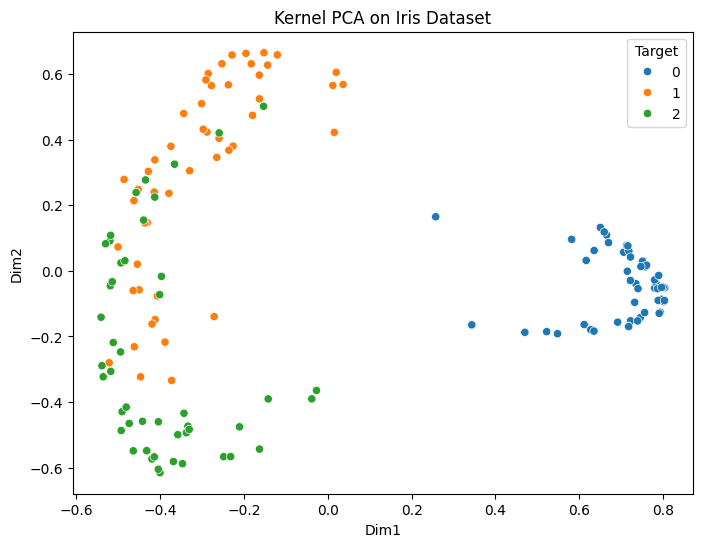

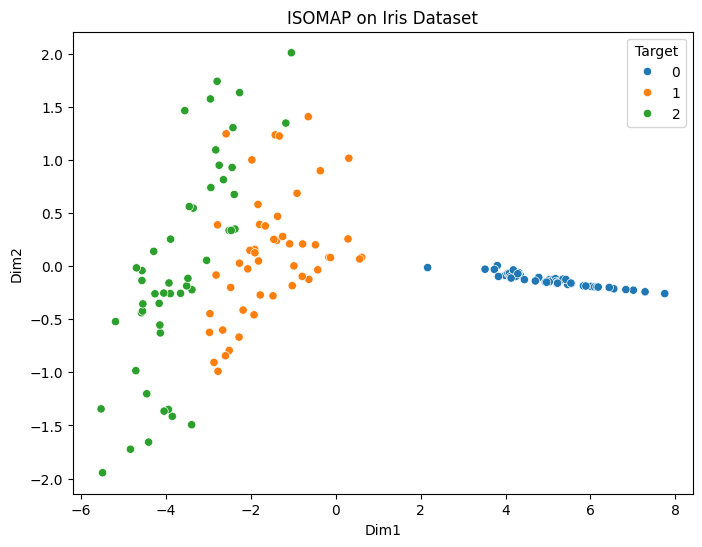

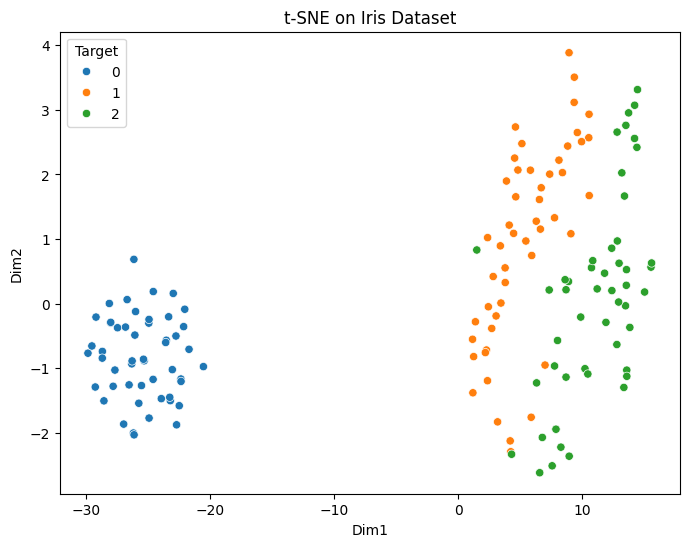

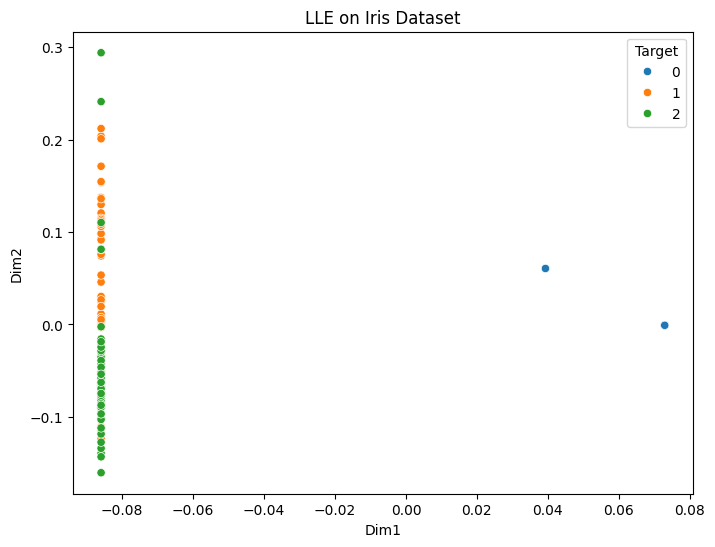

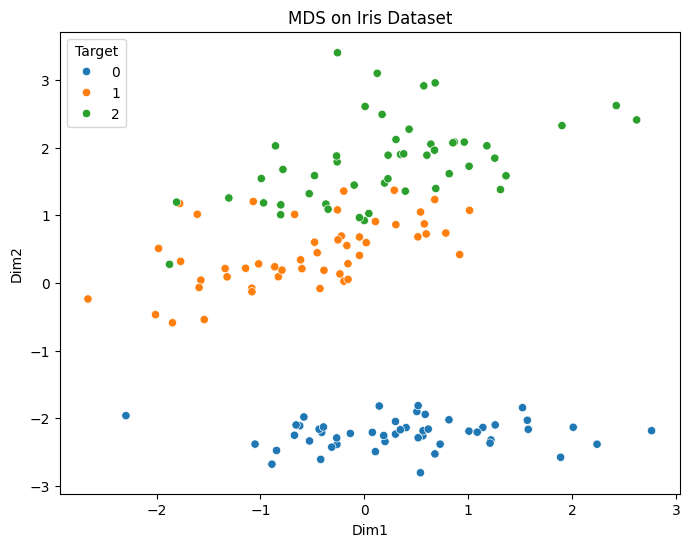

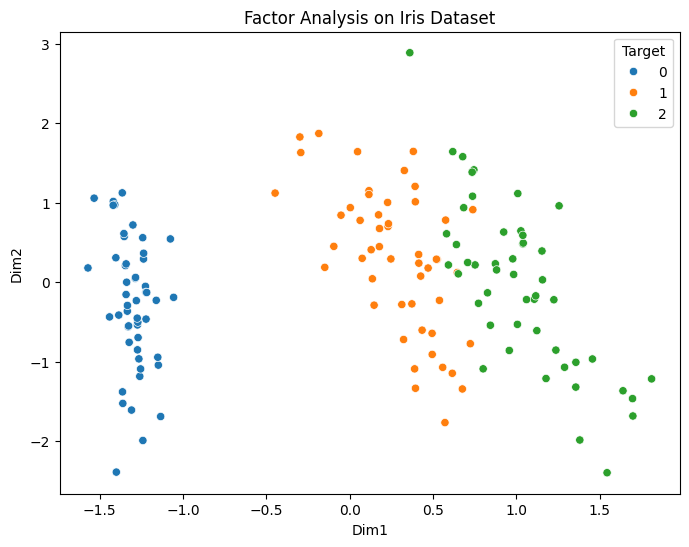

In [3]:
# Function to reduce dimensions and visualize
def visualize_reduction(data, target, technique, title):
    reduced_data = technique.fit_transform(data)
    if reduced_data.shape[1] > 2:  # Reduce to 2D if needed
        reduced_data = PCA(n_components=2).fit_transform(reduced_data)
    df = pd.DataFrame({
        'Dim1': reduced_data[:, 0],
        'Dim2': reduced_data[:, 1],
        'Target': target
    })
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Dim1', y='Dim2', hue='Target', palette='tab10')
    plt.title(title)
    plt.show()

# Apply techniques to Iris dataset
visualize_reduction(iris_data, iris_target, PCA(n_components=2), "PCA on Iris Dataset")
visualize_reduction(iris_data, iris_target, KernelPCA(n_components=2, kernel='rbf'), "Kernel PCA on Iris Dataset")
visualize_reduction(iris_data, iris_target, Isomap(n_components=2), "ISOMAP on Iris Dataset")
visualize_reduction(iris_data, iris_target, TSNE(n_components=2, perplexity=30, random_state=42), "t-SNE on Iris Dataset")
visualize_reduction(iris_data, iris_target, LocallyLinearEmbedding(n_components=2), "LLE on Iris Dataset")
visualize_reduction(iris_data, iris_target, MDS(n_components=2), "MDS on Iris Dataset")
visualize_reduction(iris_data, iris_target, FactorAnalysis(n_components=2), "Factor Analysis on Iris Dataset")

Step 4: Apply UMAP (Interactive Visualization)

In [4]:
# Apply UMAP on Digits dataset
reducer = umap.UMAP(n_components=2, random_state=42)
digits_umap = reducer.fit_transform(digits_data)

# Create an interactive plot with Plotly
df_umap = pd.DataFrame({
    'Dim1': digits_umap[:, 0],
    'Dim2': digits_umap[:, 1],
    'Target': digits_target
})
fig = px.scatter(df_umap, x='Dim1', y='Dim2', color='Target', title="UMAP on Digits Dataset")
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Step 5: Autoencoders for Dimensionality Reduction

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


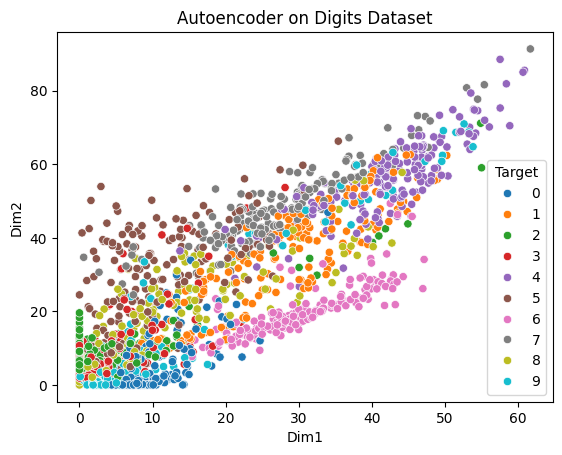

In [5]:
# Autoencoder model
input_dim = digits_data.shape[1]

autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='relu'),  # Bottleneck layer (2D representation)
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(digits_data, digits_data, epochs=50, batch_size=256, shuffle=True, verbose=0)

# Extract 2D representation
encoder = Sequential(autoencoder.layers[:3])
encoded_digits = encoder.predict(digits_data)

# Visualize
df_autoencoder = pd.DataFrame({
    'Dim1': encoded_digits[:, 0],
    'Dim2': encoded_digits[:, 1],
    'Target': digits_target
})
sns.scatterplot(data=df_autoencoder, x='Dim1', y='Dim2', hue='Target', palette='tab10')
plt.title("Autoencoder on Digits Dataset")
plt.show()
